In [123]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import r2_score

In [124]:
pd.set_option('display.max_columns', None)

In [125]:
training_data = pd.read_csv("TrainingData/pre_processed.csv")
test_data = pd.read_csv("TestData/pre_processed.csv")

In [126]:
def plot_predicted_and_target(target_data, predicted_data, title): 
    plt.figure(figsize=(20,10))
    font = {'size'   : 20}
    plt.rc('font', **font)
    
    plt.plot(range(1, len(predicted_data) + 1), predicted_data, label = "predicted")
    plt.plot(range(1, len(target_data) + 1), target_data, label = "target")
    
    plt.xlabel('scenario')
    plt.ylabel('response time')
    plt.title(title)
    plt.legend()
    plt.show()

In [127]:
def plot_mse(raw_mse, title): 
    plt.figure(figsize=(20,10))
    plt.plot(range(1, len(raw_mse) + 1), raw_mse, label = "MSE")
    plt.xlabel('scenario')
    plt.ylabel('error')
    plt.title(title)
    plt.legend()
    plt.show()

In [128]:
def get_MSE(target_data, predicted_data):
    uniform_average = mean_squared_error(target_data, predicted_data, multioutput='uniform_average')
    raw_values = mean_squared_error(target_data, predicted_data, multioutput='raw_values')
    return uniform_average, raw_values

In [129]:
target = training_data['avg_response_time']
train = training_data.drop(['avg_response_time'], axis=1)

In [130]:
test_target = test_data['avg_response_time']
test_predict = test_data.drop(['avg_response_time'], axis=1)

In [131]:
pca = PCA(n_components=6)
pca_train = pca.fit_transform(train)
pca_test_predict = pca.transform(test_predict)

# XGBoost Overall Perfomance

In [132]:
xgb_model = xgb.XGBRegressor()
xgb_y_pred = cvp(xgb_model, train, target, cv = 5, n_jobs = 1)
xgb_y_pred

array([1.2848253 , 0.6593998 , 0.66241986, 1.2798884 , 3.766056  ,
       1.278427  , 1.2725897 , 0.6672257 , 1.2888066 , 0.498271  ,
       1.966946  , 0.66082466, 2.001902  , 0.6416797 , 1.0034031 ,
       0.64764696, 0.41167113, 3.4639733 , 1.2875353 , 0.5017826 ,
       1.2775104 , 3.7724998 , 0.29733294, 1.8906329 , 1.2854357 ,
       1.9773315 , 0.6503484 , 1.27945   , 0.9912301 , 0.6595086 ,
       0.16670933, 0.665718  , 0.6639964 , 0.14655411, 2.5569613 ,
       0.67259824, 0.6466689 , 0.6465819 , 1.9826113 , 1.8953732 ,
       0.14957918, 1.2831649 , 1.2847049 , 0.1632108 , 3.6206124 ,
       0.14952667, 0.64052606, 0.6724962 , 1.268262  , 1.015674  ,
       1.2884562 , 1.2801939 , 1.9861792 , 2.213949  , 0.41205364,
       0.6570279 , 2.020996  , 1.270979  , 1.7504163 , 1.2839209 ,
       2.2337801 , 1.2873191 , 0.6690244 , 0.30632883, 1.2968678 ,
       2.0265715 , 0.6515955 , 0.67412865, 2.1445868 , 0.3986621 ,
       1.2716913 , 1.2677256 , 0.14811024, 0.66366106, 0.66055

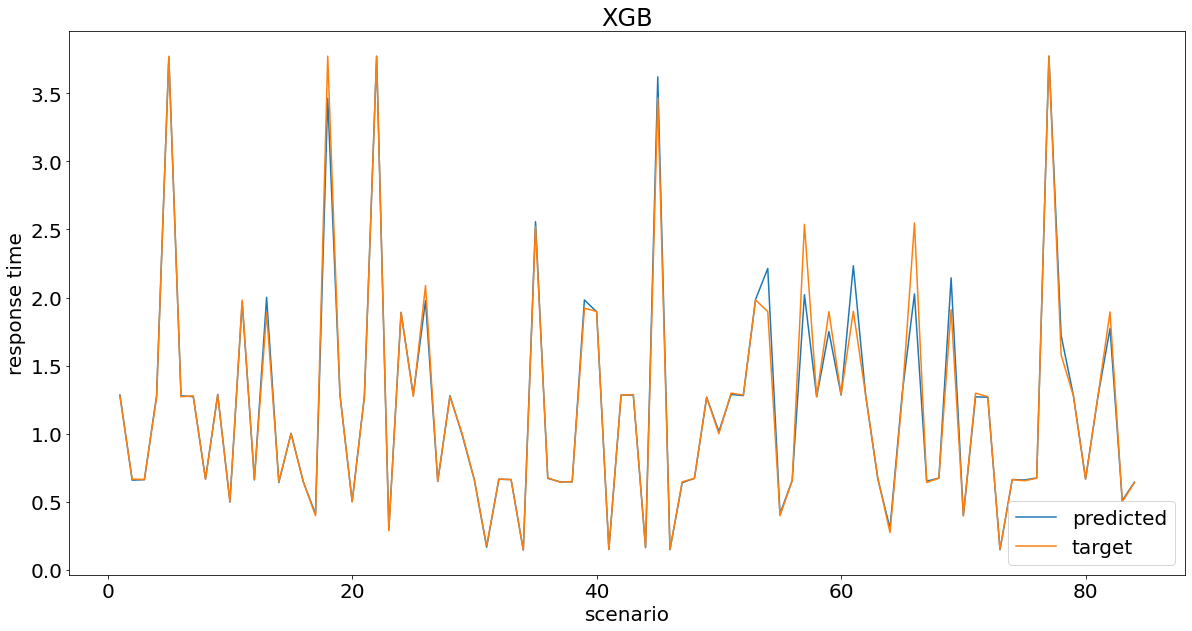

In [133]:
plot_predicted_and_target(target, xgb_y_pred, 'XGB')

In [134]:
xgb_mse, xgb_mse_raw = get_MSE(target, xgb_y_pred)
print("XGB MSE: {}".format(xgb_mse))

XGB MSE: 0.01209731957272633


In [135]:
r2_xgb = r2_score(target, xgb_y_pred)
print("XGB R2 score:", r2_xgb)

XGB R2 score: 0.983716626189028


-------

# XGBoost Test Data

In [136]:
xgb_test_model = xgb.XGBRegressor()
xgb_fit_model = xgb_test_model.fit(train, target)
xgb_fit_y_pred = xgb_fit_model.predict(test_predict)
xgb_fit_y_pred

array([3.7709465 , 1.8960263 , 2.519068  , 3.6815886 , 1.2712233 ,
       3.464881  , 3.759642  , 1.2712233 , 2.519068  , 1.8960263 ,
       2.5187407 , 1.2730174 , 3.770805  , 1.2723848 , 3.7695217 ,
       3.7717774 , 1.2721279 , 0.17500314, 2.520003  , 1.5793618 ,
       3.7720835 , 2.5180378 , 0.15030788, 0.39790317, 3.987921  ,
       1.2852141 , 1.5788368 , 1.269798  , 0.39700004, 1.2693933 ,
       0.49846858, 0.27403834, 0.39820915, 1.8951954 , 2.462452  ,
       0.27355   , 3.987921  , 0.39700004, 0.50394493, 0.1507129 ,
       0.3985569 , 0.6450362 , 0.9970145 , 0.6468716 , 0.3985569 ,
       0.1497437 , 0.2739547 ], dtype=float32)

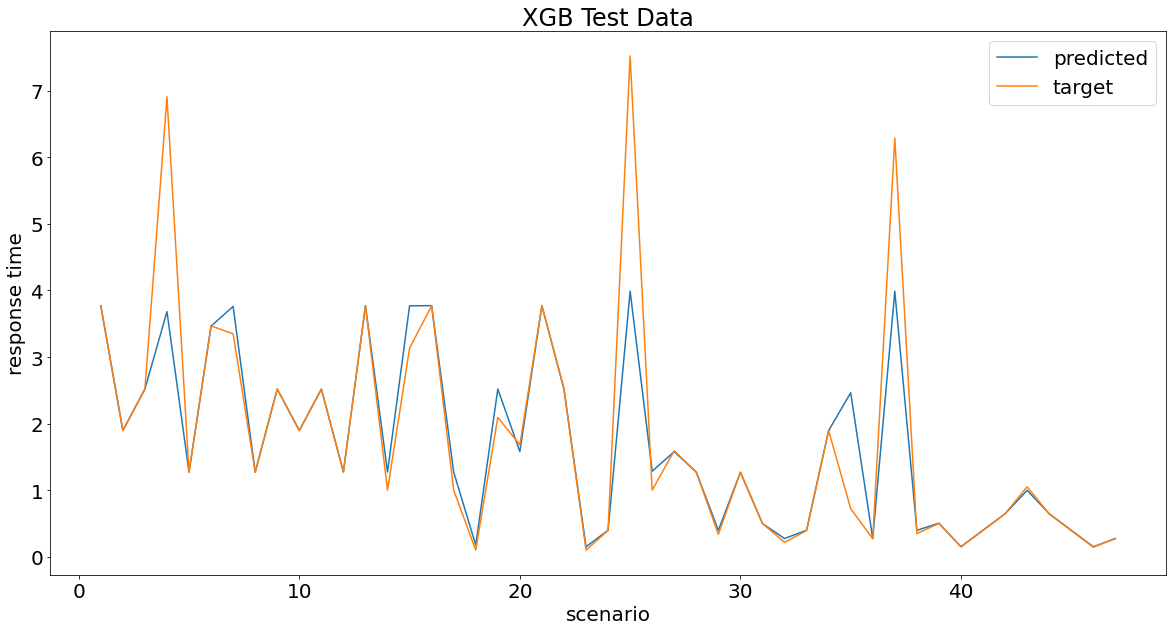

In [137]:
plot_predicted_and_target(test_target, xgb_fit_y_pred, 'XGB Test Data')

In [138]:
xgb_fit_mse, xgb_fi_mse_raw = get_MSE(test_target, xgb_fit_y_pred)
print("XGB MSE: {}".format(xgb_fit_mse))

XGB MSE: 0.686251438228982


In [139]:
r2_xgb = r2_score(test_target, xgb_fit_y_pred)
print("XGB R2 score:", r2_xgb)

XGB R2 score: 0.7781639467693948


-------

# XGBoost Overall Perfomance with PCA

In [140]:
xgb_pca_y_pred = cvp(xgb_model, pca_train, target, cv = 5, n_jobs = 1)
xgb_pca_y_pred

array([1.2729937 , 0.6691227 , 0.6937764 , 0.86103225, 3.7176547 ,
       1.3588394 , 0.90001214, 0.667528  , 1.282468  , 0.8621693 ,
       2.012607  , 0.6593542 , 3.4646182 , 0.6759773 , 1.3803648 ,
       0.64639765, 0.41075805, 2.0011122 , 1.2854528 , 0.53802687,
       1.2470441 , 3.7723851 , 0.3895178 , 1.8736429 , 1.2565826 ,
       1.9810905 , 0.6498308 , 1.2607998 , 0.6749749 , 0.6626366 ,
       0.1821555 , 0.6664888 , 1.2100167 , 0.15235634, 1.3115381 ,
       0.9559148 , 0.7735627 , 0.63588357, 0.8059288 , 1.897532  ,
       0.2388076 , 1.2978935 , 1.4473951 , 0.17142317, 2.0925918 ,
       0.23628119, 0.7681748 , 0.6670089 , 1.3045636 , 1.1957203 ,
       1.415166  , 1.2829716 , 1.9813836 , 2.9871442 , 0.6550606 ,
       0.65543956, 1.368242  , 2.0301178 , 3.0452094 , 1.2848824 ,
       1.3341501 , 1.2992312 , 1.2353005 , 0.29115862, 2.0276494 ,
       1.3486996 , 0.64940834, 0.6507337 , 1.943199  , 0.40122837,
       0.70030785, 1.2657745 , 0.14815253, 0.7464213 , 0.65958

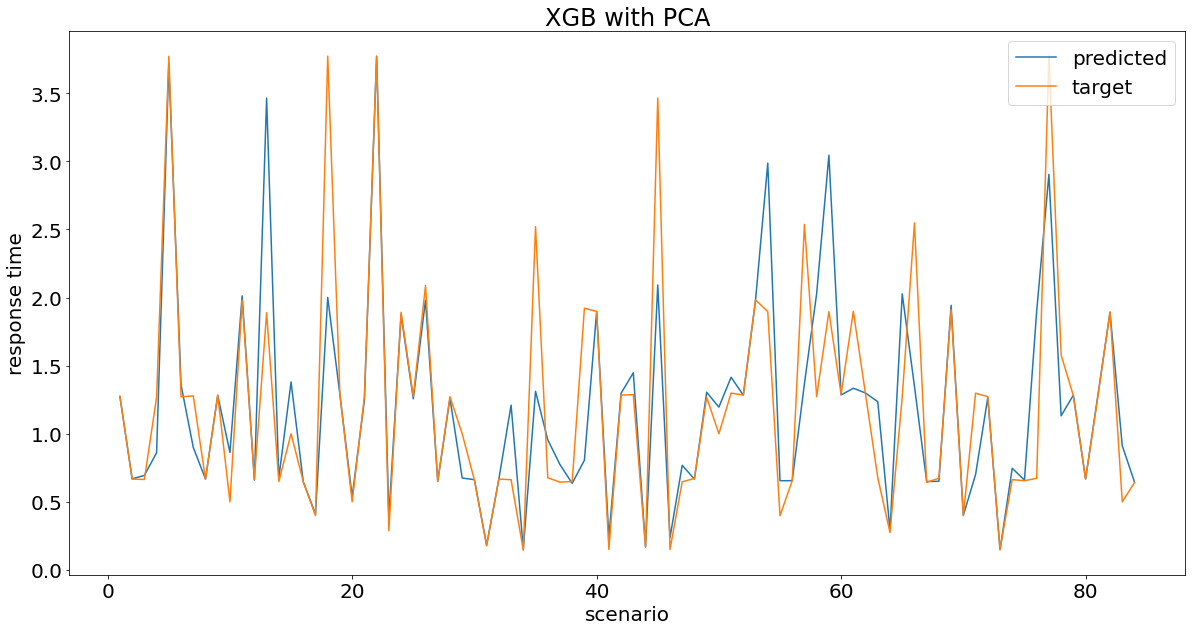

In [141]:
plot_predicted_and_target(target, xgb_pca_y_pred, 'XGB with PCA')

In [142]:
xgb_pca_mse, xgb_pca_mse_raw = get_MSE(target, xgb_pca_y_pred)
print("XGB with PCA MSE:{}".format(xgb_pca_mse))

XGB with PCA MSE:0.25717128372083203


In [143]:
r2_pca_xgb = r2_score(target, xgb_pca_y_pred)
print("XGB with PCA R2 score:", r2_pca_xgb)

XGB with PCA R2 score: 0.6538393384502376


-------

# XGBoost with PCA Test Data

In [144]:
xgb_pca_test_model = xgb.XGBRegressor()
xgb_pca_fit_model = xgb_pca_test_model.fit(pca_train, target)
xgb_pca_fit_y_pred = xgb_pca_fit_model.predict(pca_test_predict)
xgb_pca_fit_y_pred

array([2.1536183 , 1.8956649 , 2.2298872 , 2.2318578 , 0.6713913 ,
       2.2441015 , 1.5654616 , 1.4082452 , 1.3030163 , 1.890575  ,
       1.3030163 , 0.6713913 , 3.6939619 , 0.61519414, 1.5649943 ,
       2.153841  , 0.6174643 , 0.1532027 , 0.877701  , 1.5572089 ,
       3.7710834 , 2.2458858 , 0.1639897 , 1.0438174 , 2.5996594 ,
       0.6140087 , 1.5535069 , 1.2744738 , 0.59574604, 1.2795275 ,
       0.6923198 , 0.24826524, 0.40099934, 1.8968395 , 1.1172892 ,
       0.24809478, 2.221736  , 0.5933999 , 0.5042173 , 0.17007738,
       1.0390157 , 0.64569426, 0.962271  , 0.64997596, 0.4007815 ,
       0.14943784, 0.33440095], dtype=float32)

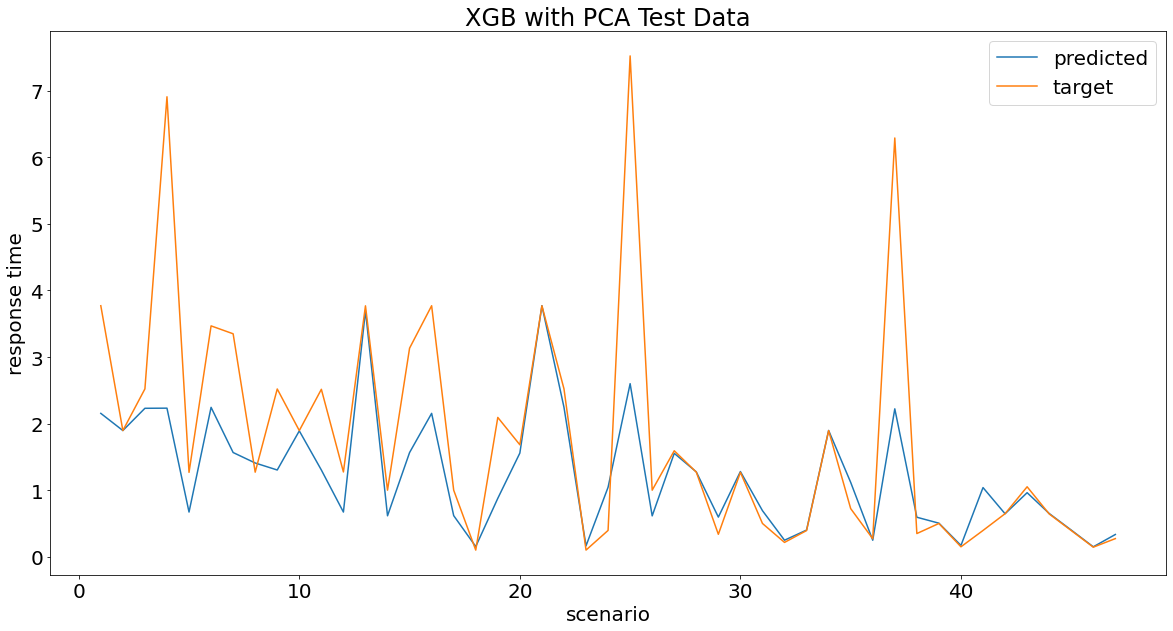

In [145]:
plot_predicted_and_target(test_target, xgb_pca_fit_y_pred, 'XGB with PCA Test Data')

In [146]:
xgb_pca_fit_mse, xgb_pca_fi_mse_raw = get_MSE(test_target, xgb_pca_fit_y_pred)
print("XGB with PCA Test Data MSE: {}".format(xgb_pca_fit_mse))

XGB with PCA Test Data MSE: 1.7445606487276186


In [147]:
r2_pca_fit_xgb = r2_score(test_target, xgb_pca_fit_y_pred)
print("XGB with PCA Test Data R2 score:", r2_pca_fit_xgb)

XGB with PCA Test Data R2 score: 0.4360573583147428


-------

# Linear Regression Overall Perfomance

In [148]:
reg_model = LinearRegression(positive=True, fit_intercept=False)
reg_y_pred = cvp(reg_model, train, target, cv = 5, n_jobs = 1)
reg_y_pred

array([1.4991958 , 0.95995683, 0.95995683, 1.38067468, 2.3406315 ,
       1.38067468, 1.38067468, 0.95995683, 1.38067468, 0.95995683,
       1.80139253, 0.95995683, 1.80139253, 0.95995683, 1.38067468,
       0.95995683, 1.37000135, 2.86219445, 1.34158237, 0.96142935,
       1.34158237, 2.30301171, 0.87656131, 1.72173539, 1.34158237,
       1.72173539, 0.96142935, 1.54270567, 1.34158237, 0.96142935,
       0.49640829, 0.96142935, 0.96142935, 0.49640829, 1.95194896,
       0.97597448, 0.97597448, 0.97597448, 1.76814191, 1.76814191,
       0.51206187, 1.37205819, 1.37205819, 0.51206187, 2.95639305,
       0.51206187, 0.97597448, 0.97597448, 1.37205819, 1.37205819,
       1.55586524, 1.38020505, 1.815245  , 1.815245  , 1.40714488,
       0.9451651 , 1.89033019, 1.45529024, 1.815245  , 1.45529024,
       1.815245  , 1.38020505, 0.9451651 , 0.97210493, 1.45529024,
       1.89033019, 0.9451651 , 0.9451651 , 1.80635117, 1.39157853,
       1.37705604, 1.37705604, 0.53298828, 0.94776092, 0.94776

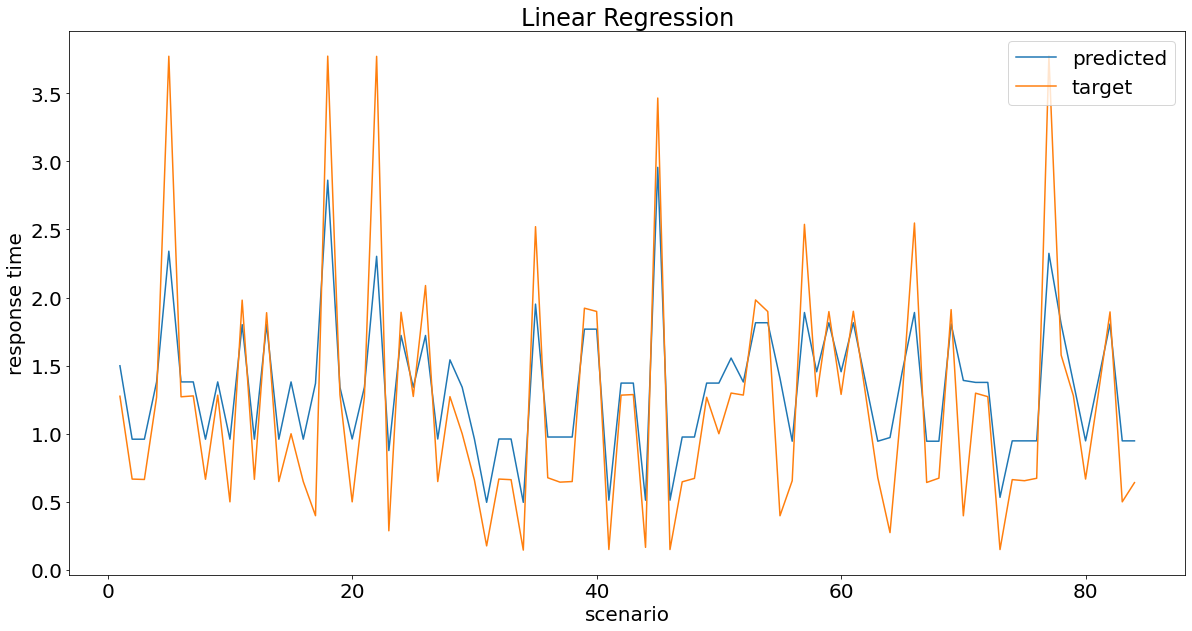

In [149]:
plot_predicted_and_target(target, reg_y_pred, 'Linear Regression')

In [150]:
reg_mse, reg_mse_raw = get_MSE(target, reg_y_pred)
print("Linear Regression MSE:{}".format(reg_mse))

Linear Regression MSE:0.20325524242555681


In [151]:
r2_reg = r2_score(target, reg_y_pred)
print("Linear Regression R2 Score:", r2_reg)

Linear Regression R2 Score: 0.7264120310653926


-------

# Linear Regression Test Data

In [152]:
reg_fit_model = LinearRegression(positive=True, fit_intercept=False)
reg_fit_model = reg_fit_model.fit(train, target)
reg_fit_y_pred = reg_fit_model.predict(test_predict)
reg_fit_y_pred

array([2.32981861, 1.78454302, 1.91672947, 3.56908604, 1.50364032,
       3.02381045, 2.32981861, 1.50364032, 1.91672947, 1.78454302,
       1.91672947, 1.50364032, 2.32981861, 1.50364032, 2.32981861,
       2.32981861, 1.50364032, 0.52214426, 1.91672947, 1.78454302,
       2.32981861, 1.91672947, 0.52214426, 1.34832255, 3.56908604,
       1.50364032, 1.78454302, 1.37145388, 1.34832255, 1.37145388,
       0.95836473, 0.9352334 , 1.34832255, 1.78454302, 2.58758998,
       0.9352334 , 3.56908604, 1.34832255, 0.95836473, 0.52214426,
       1.34832255, 0.95836473, 1.37145388, 0.95836473, 1.34832255,
       0.52214426, 0.9352334 ])

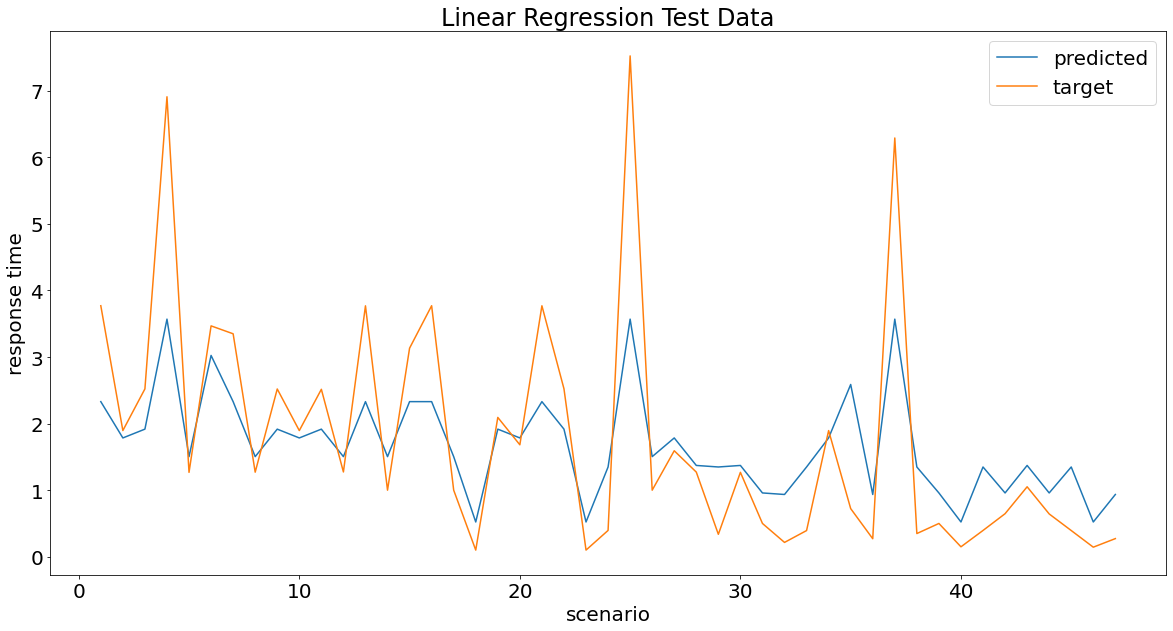

In [153]:
plot_predicted_and_target(test_target, reg_fit_y_pred, 'Linear Regression Test Data')

In [154]:
reg_fit_mse, reg_fit_mse_raw = get_MSE(test_target, reg_fit_y_pred)
print("Linear Regression Test Data MSE: {}".format(reg_fit_mse))

Linear Regression Test Data MSE: 1.2505707811557114


In [155]:
r2_fit_reg = r2_score(test_target, reg_fit_y_pred)
print("Linear Regression Test Data R2 score:", r2_fit_reg)

Linear Regression Test Data R2 score: 0.5957433807453377


-------

# Linear Regression Overall Perfomance with PCA

In [156]:
reg_model_pca = LinearRegression()
reg_pca_y_pred = cvp(reg_model_pca, pca_train, target, cv = 5, n_jobs = 1)
reg_pca_y_pred

array([ 1.69888301,  0.73096491,  0.7230906 ,  1.28779507,  2.91621458,
        1.27946382,  1.23181474,  0.69353939,  1.35871074,  0.37159831,
        1.9952283 ,  0.72219317,  1.93326455,  0.62282809,  1.0887803 ,
        0.60930594,  1.07618952,  3.73734312,  1.31403579,  0.48109739,
        1.22187237,  2.9206229 ,  0.42474219,  1.90622029,  1.22688493,
        1.96956069,  0.65886237,  1.7424783 ,  1.02743543,  0.71286908,
       -0.27081496,  0.64565774,  0.65687841, -0.31449966,  2.33430659,
        0.71332756,  0.53348514,  0.54689135,  1.91086833,  1.87618247,
       -0.37009308,  1.31186662,  1.35174828, -0.27437271,  3.67856005,
       -0.38898703,  0.55372527,  0.65167905,  1.24862306,  1.1143249 ,
        1.83085804,  1.38598973,  1.98667183,  1.90167427,  1.00362343,
        0.78530763,  2.49757154,  1.85109091,  1.87114669,  1.88331271,
        1.94087329,  1.36314168,  0.57617925,  0.39380602,  1.78563024,
        2.38576914,  0.65133639,  0.59940922,  1.9565049 ,  1.07

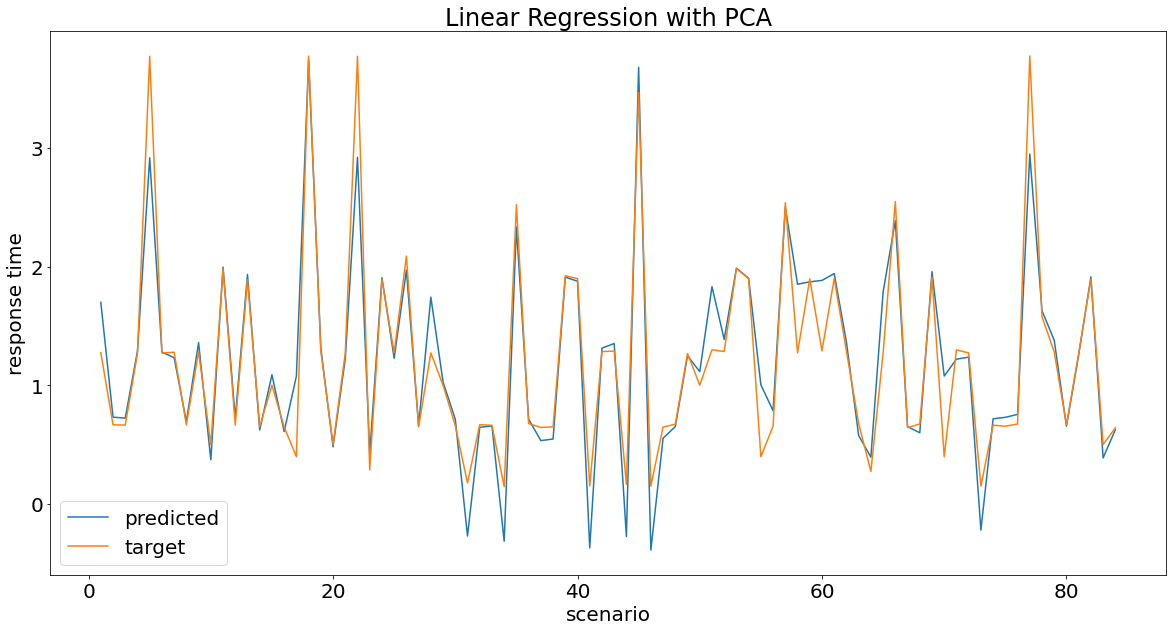

In [157]:
plot_predicted_and_target(target, reg_pca_y_pred, 'Linear Regression with PCA')

In [158]:
reg_pca_mse, reg_pca_mse_raw = get_MSE(target, reg_pca_y_pred)
print("Linear Regression with PCA MSE:{}".format(reg_pca_mse))

Linear Regression with PCA MSE:0.08022868048006113


In [159]:
r2_reg_pca = r2_score(target, reg_pca_y_pred)
print("Linear Regression with PCA R2 Score:", r2_reg_pca)

Linear Regression with PCA R2 Score: 0.8920096648878189


-------

# Linear Regression with PCA Test Data

In [161]:
reg_pca_fit_model = LinearRegression(positive=True, fit_intercept=False)
reg_pca_fit_model = reg_pca_fit_model.fit(pca_train, target)
reg_pca_fit_y_pred = reg_pca_fit_model.predict(pca_test_predict)
reg_pca_fit_y_pred

array([ 1.74287178,  0.58312877,  1.04809782,  3.30782353,  0.51870163,
        2.20623583,  1.42054283,  0.367326  ,  1.19064282,  0.71684313,
        1.19567642,  0.53132929,  1.61798805,  0.20532297,  1.38913696,
        1.80960019,  0.21795063, -1.69284498,  0.84573864,  0.37193895,
        1.64056328,  1.09213135, -1.7242863 , -0.14146737,  3.56330442,
        0.25822258,  0.29637991,  0.09788576, -0.52660805, -0.04465924,
       -0.8924677 , -1.16714337, -0.32816555,  0.66777599,  1.33026406,
       -0.92063101,  3.22723087, -0.46871028, -2.06318519, -1.39704339,
       -0.22585705, -0.69893916, -0.22935715, -0.52107161, -0.35957142,
       -1.53075775, -0.77808601])

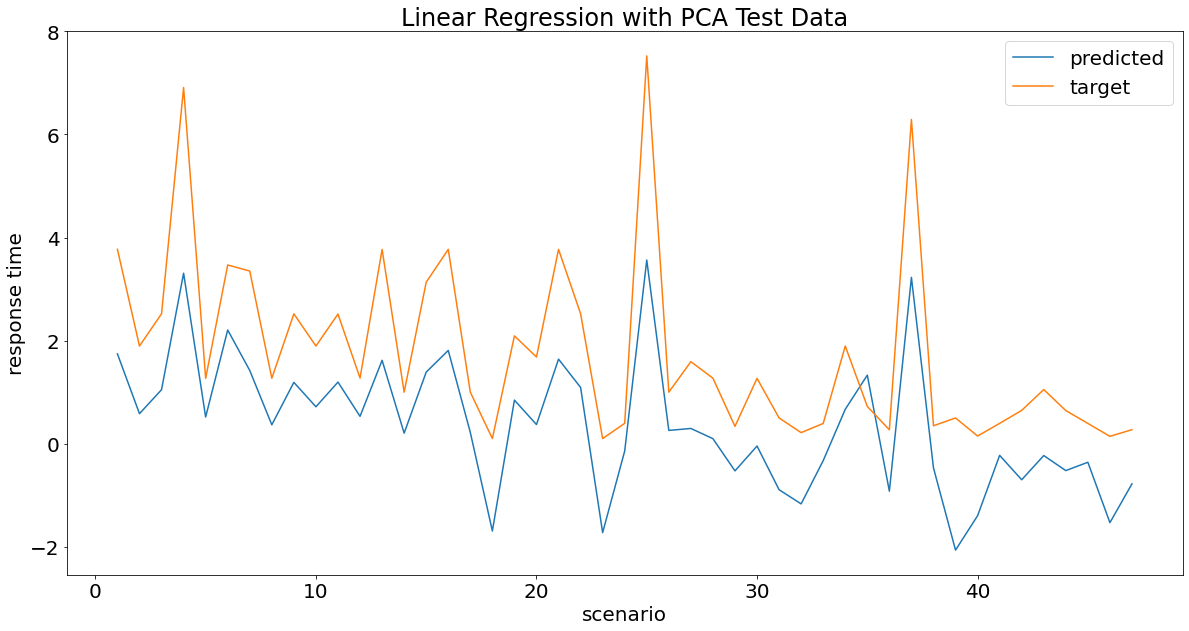

In [163]:
plot_predicted_and_target(test_target, reg_pca_fit_y_pred, 'Linear Regression with PCA Test Data')

In [164]:
reg_fit_pca_mse, reg_fit_pca_mse_raw = get_MSE(test_target, reg_pca_fit_y_pred)
print("Linear Regression with PCA Test Data MSE: {}".format(reg_fit_pca_mse))

Linear Regression with PCA Test Data MSE:2.5666855126648294


In [165]:
r2_fit_reg_pca = r2_score(test_target, reg_pca_fit_y_pred)
print("Linear Regression with PCA Test Data R2 Score: ", r2_fit_reg_pca)

Linear Regression with PCA Test Data R2 Score:  0.17029917564449337
